# Melody/pitch analysis (global distribution)

Here we fit the global distribution of relative melodic bigrams to heavy-tailed distributions and assess goodness-of-fit using the bootstrap data in the `bootstrap` directory. 

In [1]:
import numpy as np
import pandas as pd
import powerlaw as pl
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
sns.set(style='darkgrid')

In [2]:
from distributions import Lognormal, Exponential, Stretched_exponential, Positive_lognormal, Powerlaw_with_cutoff

In [4]:
pitch_ranks = pd.read_csv('../data/pitch_ranks.csv')['ranks']

In [5]:
fit = pl.Fit(pitch_ranks, discrete=True)

Calculating best minimal value for power law fit
/Users/benlebrun/opt/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/benlebrun/opt/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


In [6]:
fit.xmin, fit.alpha, fit.D

(15.0, 6.529766354791297, 0.09847060683162784)

## Power-law

In [8]:
# powerlaw bootstrap
powerlaw_boot = pd.read_csv('bootstrap/pitch_bootstrap/pitch_pl.csv')

In [9]:
Ds = powerlaw_boot['D']

In [10]:
print('p =', len(list(filter(lambda d: d>fit.D, Ds)))/1e3)

p = 0.0


Text(0.5, 1.0, 'Histogram of bootstrap KS distances')

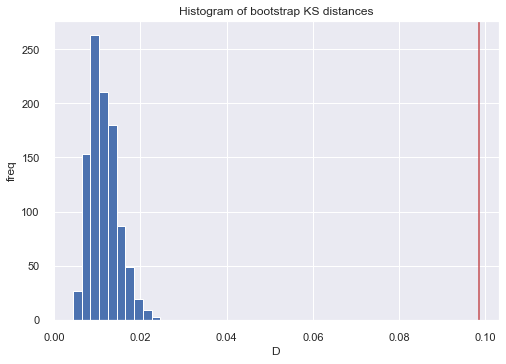

In [11]:
n = plt.hist(Ds, bins=10)
plt.axvline(x=fit.D, color='r')
plt.xlabel('D')
plt.ylabel('freq')
plt.title('Histogram of bootstrap KS distances')
#plt.savefig('pitch_pl.png')

## Lognormal

In [12]:
ln_fit = Lognormal(pitch_ranks)

In [13]:
ln_fit.xmin, ln_fit.sigma, ln_fit.mu, ln_fit.D

(19.0, 0.10394131858896394, 2.9145764980969777, 0.0504010146320546)

In [14]:
ln_boot = pd.read_csv('bootstrap/pitch_bootstrap/pitch_ln.csv')

In [15]:
Ds = ln_boot['D']

In [16]:
print('p =', len(list(filter(lambda d: d>ln_fit.D, Ds)))/1e3)

p = 0.007


Text(0, 0.5, 'freq')

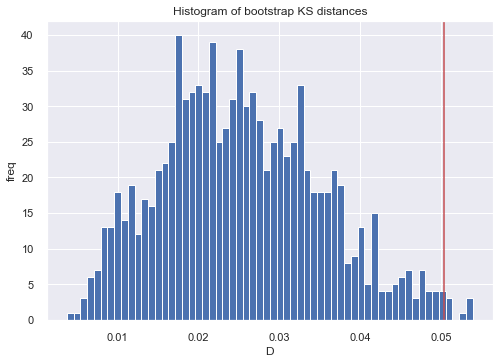

In [17]:
n = plt.hist(Ds, bins=60)
plt.axvline(x=ln_fit.D, color='r')
plt.xlabel('D')
plt.title('Histogram of bootstrap KS distances')
plt.ylabel('freq')
#plt.savefig('pitch_ln.png')

## Exponential

In [18]:
exp_fit = Exponential(pitch_ranks)

In [19]:
exp_fit.xmin, exp_fit.Lambda, exp_fit.D

(20.0, 0.726211847356715, 0.045449605050046804)

In [20]:
exp_boot = pd.read_csv('bootstrap/pitch_bootstrap/pitch_exp.csv')

Text(0, 0.5, 'freq')

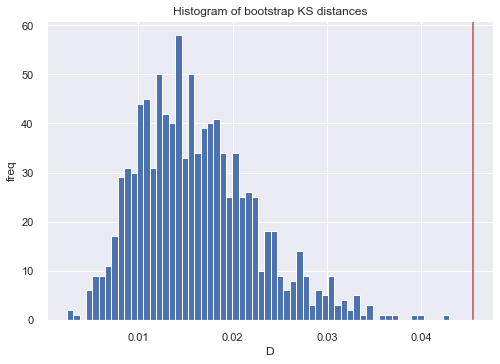

In [21]:
n = plt.hist(exp_boot['D'], bins=60)
plt.axvline(x=exp_fit.D, color='r')
plt.xlabel('D')
plt.title('Histogram of bootstrap KS distances')
plt.ylabel('freq')
#plt.savefig('pitch_exp.png')

In [22]:
print('p =', len(list(filter(lambda d: d>exp_fit.D, exp_boot['D'])))/1e3)

p = 0.0


### Stretched exponential

In [23]:
str_exp_fit = Stretched_exponential(pitch_ranks)

In [24]:
str_exp_fit.xmin, str_exp_fit.Lambda, str_exp_fit.beta, exp_fit.D

(7.0, 0.08937204064364583, 2.1854766479209937, 0.045449605050046804)

In [25]:
str_exp_boot = pd.read_csv('bootstrap/pitch_bootstrap/pitch_str_exp.csv')

Text(0, 0.5, 'freq')

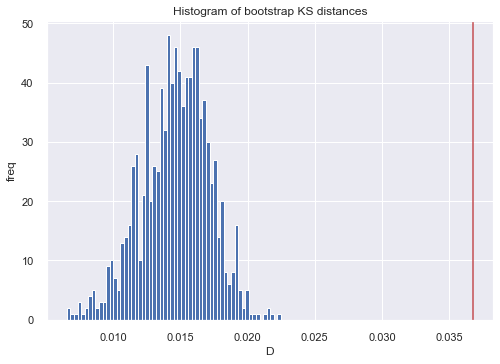

In [26]:
n = plt.hist(str_exp_boot['D'], bins=60)
plt.axvline(x=str_exp_fit.D, color='r')
plt.xlabel('D')
plt.title('Histogram of bootstrap KS distances')
plt.ylabel('freq')
#plt.savefig('pitch_str_exp.png')

In [27]:
print('p =', len(list(filter(lambda d: d>str_exp_fit.D, str_exp_boot['D'])))/1e3)

p = 0.0


### Positive lognormal

In [28]:
pos_ln_fit = Positive_lognormal(pitch_ranks)

In [29]:
pos_ln_boot = pd.read_csv('bootstrap/pitch_bootstrap/pitch_pln.csv')

In [30]:
pos_ln_fit.xmin, pos_ln_fit.mu, pos_ln_fit.sigma, pos_ln_fit.D

(19.0, 2.9145764980969777, 0.10394131858896394, 0.0504010146320546)

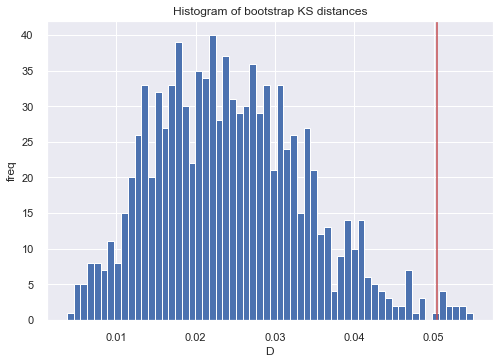

In [31]:
n = plt.hist(pos_ln_boot['D'], bins=60)
plt.axvline(x=pos_ln_fit.D, color='r')
plt.xlabel('D')
plt.ylabel('freq')
plt.title('Histogram of bootstrap KS distances')
#plt.savefig('pitch_pln.png')

In [32]:
print('p =', len(list(filter(lambda d: d>pos_ln_fit.D, pos_ln_boot['D'])))/1e3)

p = 0.012


### Powerlaw with exponential cutoff

In [34]:
cutoff = pd.read_csv('bootstrap/pitch_bootstrap/pitch_pl_cut_off.csv')

In [35]:
cutoff_fit = Powerlaw_with_cutoff(pitch_ranks)

In [36]:
cutoff_fit.xmin, cutoff_fit.alpha, cutoff_fit.Lambda, cutoff_fit.D

(2.0, 1.0000000666108444, 0.084847860267088, 0.04665129575378957)

Text(0.5, 1.0, 'Histogram of bootstrap KS distances')

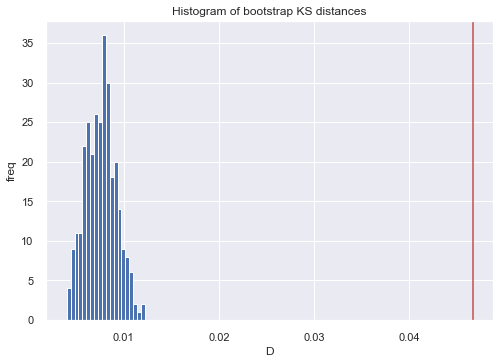

In [37]:
n = plt.hist(cutoff['D'], bins=20)
plt.axvline(x=cutoff_fit.D, color='r')
plt.xlabel('D')
plt.ylabel('freq')
plt.title('Histogram of bootstrap KS distances')
#plt.savefig('pitch_pl_cutoff.png')

In [39]:
print('p =', len(list(filter(lambda d: d>cutoff_fit.D, cutoff['D'])))/200)

p = 0.0
